In [4]:
%pylab inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas_datareader.data as web
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [0]:
def get_prices(symbol):
    start, end = '2018-04-31', '2019-04-31'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Close']
    prices=prices.astype(float)
    return prices

def get_returns(prices):
        return ((prices-prices.shift(-1))/prices)[:-1]
    
def get_data(list):
    l = []
    for symbol in list:
        rets = get_returns(get_prices(symbol))
        l.append(rets)
    return np.array(l).T

def sort_data(rets):
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)
        


In [0]:
symbol_list = ['GOOG', 'MSFT']
rets = get_data(symbol_list)
ins, outs = sort_data(rets)
ins = ins.transpose([0,2,1]).reshape([-1, len(symbol_list) * 100])
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]

In [0]:
sess = tf.InteractiveSession()

In [8]:
#Define placeholders 
x = tf.placeholder(tf.float32, [None, len(symbol_list) * 100])
y_ = tf.placeholder(tf.float32, [None, len(symbol_list)])

#Define trainable variables
W = tf.Variable(tf.random_normal([len(symbol_list) * 100, len(symbol_list)]))
b = tf.Variable(tf.random_normal([len(symbol_list)]))

#Regression
y = tf.matmul(x, W) + b

#MSE:
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
#Initialize variables to random values
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs})#.reshape(1,-1).T})
    #Record progress every 1000 iterations
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs})#.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.040915698
Epoch: 2000 cost= 0.020234287
Epoch: 3000 cost= 0.012726652
Epoch: 4000 cost= 0.008579744
Epoch: 5000 cost= 0.006110362
Epoch: 6000 cost= 0.004591146
Epoch: 7000 cost= 0.003633401
Epoch: 8000 cost= 0.003016822
Epoch: 9000 cost= 0.002612460
Epoch: 10000 cost= 0.002342888
Epoch: 11000 cost= 0.002160538
Epoch: 12000 cost= 0.002035585
Epoch: 13000 cost= 0.001948974
Epoch: 14000 cost= 0.001888323
Epoch: 15000 cost= 0.001845464
Epoch: 16000 cost= 0.001814929
Epoch: 17000 cost= 0.001793015
Epoch: 18000 cost= 0.001777183
Epoch: 19000 cost= 0.001765679
Epoch: 20000 cost= 0.001757273


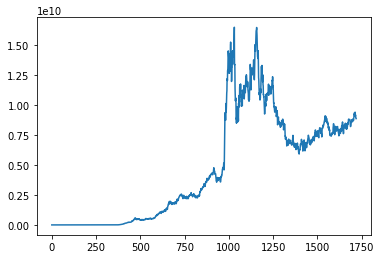

In [10]:
#Train results
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position * train_outs
daily_returns = sum(returns,1)
plot(np.cumprod(daily_returns+1))

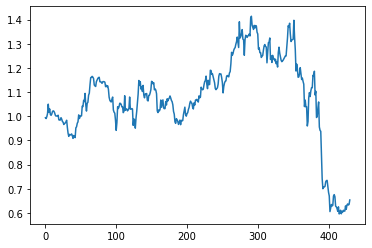

In [11]:
#Test results
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position * test_outs
daily_returns = sum(returns,1)
plot(np.cumprod(daily_returns+1))